# Schrödinger's Equation

One of the most important governing equations in all of physics. If you do anything to do with quantum mechanics, chances are you'll be dealing with Schrödinger's Equation in one form or another.

The Time Dependent Schrödinger Equation (TDSE) in one (spatial) dimension is written:

$$ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = \hat{\mathbf{H}} \Psi (x,t) $$

where $\hat{\mathbf{H}}$ is the hamiltonian defined as $\hat{\mathbf{H}} = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x,t) $ and $\Psi(x,t)$ is the wave function.

In general, this is not an easy partial differential equation (PDE) to solve. Fortunately, with a few mild assumptions, we can simplify the equation to the Time Independent Schrödinger Equation (TISE):

First we assume our potential energy function is independent of time $V(x,t) = V(x)$. Then look for solutions of the form $\Psi(x,t) = \psi(x) \phi(t)$ for some $\psi(x)$ and $\phi(t)$.

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$


### Problem 1: Solving half of the problem for good

Given only the assumptions and notation above, solve the TDSE for $\phi(t)$ for all possible <font color='red'>time-independent</font> $V(x)$.

Hint: Plug in $\Psi(x,t)=\psi(x)\phi(t)$ to the TDSE, apply the TISE, and solve the resulting first order ordinary differential equation. <font color='red'>Recall that $i^2 = -1.$</font>

<font color='red'>This problem corresponds to Section 1.4 of the book.</font>

psi(t) = Ce^(E/ih_bar)

## Example 1: Solving Schrödinger's Equation Numerically (For Particle in the Box)

<font color='red'>The TISE is nothing more than an eigenvalue equation, so if we can write our hamiltonian as a matrix, then all we have to do is solve for the eigenvalues and eigenvectors/eigenfunctions and we'll have. Since you already found $\phi(t)$, then we'll know everything we could possibly want to about our system!</font>

If you hear "numerically" in the context of python, you know what's coming... some `numpy` magic.

<font color='red'>This problem corresponds to Section 1.6 of the book.</font>
<font color='red'>The Particle in the Box corresponds to Section 1.5.1 of the book.</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

There are two especially useful `numpy` functions we'll need here:`linalg.eig` and `eye`.

In [2]:
np.eye?

Signature:
np.eye(
    N,
    M=None,
    k=0,
    dtype=<class 'float'>,
    order='C',
    *,
    device=None,
    like=None,
)
Docstring:
Return a 2-D array with ones on the diagonal and zeros elsewhere.

Parameters
----------
N : int
  Number of rows in the output.
M : int, optional
  Number of columns in the output. If None, defaults to `N`.
k : int, optional
  Index of the diagonal: 0 (the default) refers to the main diagonal,
  a positive value refers to an upper diagonal, and a negative value
  to a lower diagonal.
dtype : data-type, optional
  Data-type of the returned array.
order : {'C', 'F'}, optional
    Whether the output should be stored in row-major (C-style) or
    column-major (Fortran-style) order in memory.
device : str, optional
    The device on which to place the created array. Default: None.
    For Array-API interoperability only, so must be ``"cpu"`` if passed.

    .. versionadded:: 2.0.0
like : array_like, optional
        Reference object to allow the creat

In [3]:
np.linalg.eig?

Signature:       np.linalg.eig(a)
Call signature:  np.linalg.eig(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function eig at 0x7987002aeac0>
File:            ~/anaconda3/envs/ee421/lib/python3.13/site-packages/numpy/linalg/_linalg.py
Docstring:      
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
A namedtuple with the following attributes:

eigenvalues : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

eigenvectors : (..., M, M) array
    The normalized (unit "length") eig

The trick to representing our hamiltonian as a matrix is discretization. See details in the lecture notes, but the notation below should be very similar.

We'll be simulating a toy system with arbitrary units.

In [4]:
N = 100
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

In [5]:
X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

In [6]:
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian

If you're ever curious about what your matrix actually looks like, you can plot it using `matshow`. And mouse over elements to see their values. Note that our Hamitonian has offdiagonal elements, where do they come from and why do we need those?

<font color='red'>This problem corresponds to Section 1.6 of the book.</font>

[Your answer here]

[[ 0.9801  -0.49005  0.      ...  0.       0.       0.     ]
 [-0.49005  0.9801  -0.49005 ...  0.       0.       0.     ]
 [ 0.      -0.49005  0.9801  ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.9801  -0.49005  0.     ]
 [ 0.       0.       0.      ... -0.49005  0.9801  -0.49005]
 [ 0.       0.       0.      ...  0.      -0.49005  0.9801 ]]


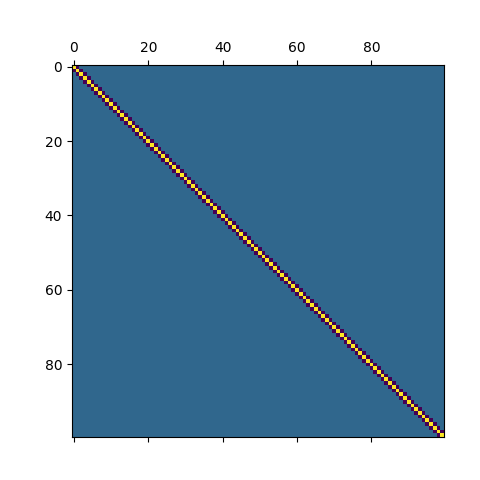

In [7]:
print(H)
plt.matshow(H)

## (RED)
## Comment out the lines below to see a zoomed in version of the Hamiltonian.
#plt.plot(H)
#plt.xlim(20, 30)
#plt.ylim(30, 20)
#plt.show()

Now let's actually solve the TISE for the energy eigenvalues and eigenfunctions using `linalg.eig`.

In [8]:
vals, vecs = np.linalg.eig(H)

Unfortunately, `linalg.eig` does not return the eigenvalues/vectors sorted, but that can be fixed with a little `numpy` magic. Make sure you understand how to two lines below work - tricks like these can dramatically speed up your work.
Also, since our `vecs` variable holds column vectors we can flip those to row vectors in the last line. We also have to normalize our energy eigenfunction (given the grid spacing that we were using).

In [9]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

Now, we have the energy eigenvalues and the eigenfunctions (also called eigenvectors or eigenstates).

Before plotting the energy spectrum below, what do you expect the energy eigenvalues will look like, given that our potential energy is zero accross the entire wire (V=0)?

[Your answer here]

Text(0, 0.5, 'Energy (arb. units)')

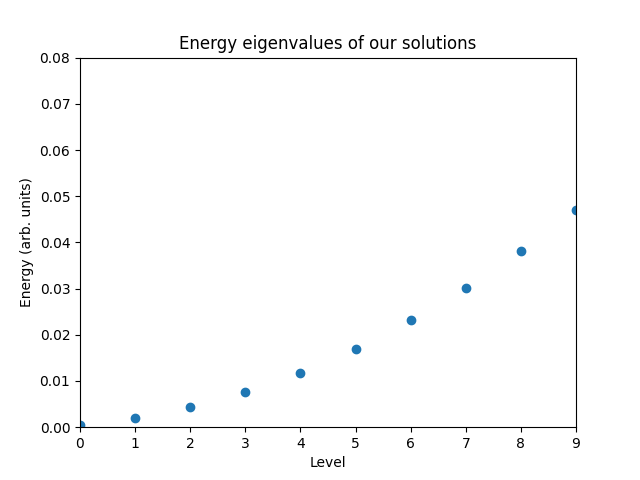

In [10]:
# (RED)
# This plots the lowest 10 energy eigenvalues.
plt.figure()
plt.plot(vals,'o')
plt.xlim(0, 9)
plt.ylim(0, 0.08)
plt.title('Energy eigenvalues of our solutions')
plt.xlabel('Level')
plt.ylabel('Energy (arb. units)')

Does this energy spectrum look as expected? If not, why not?

[Your answer here]

Finally, we can print the first <font color='red'>five</font> energy eigenvalues and plot the corresponding eigenfunctions we found. But you already know what to expect, right?

E_0 = 0.0005
E_1 = 0.0019
E_2 = 0.0043
E_3 = 0.0076
E_4 = 0.0118


Text(0.5, 0, '$x$')

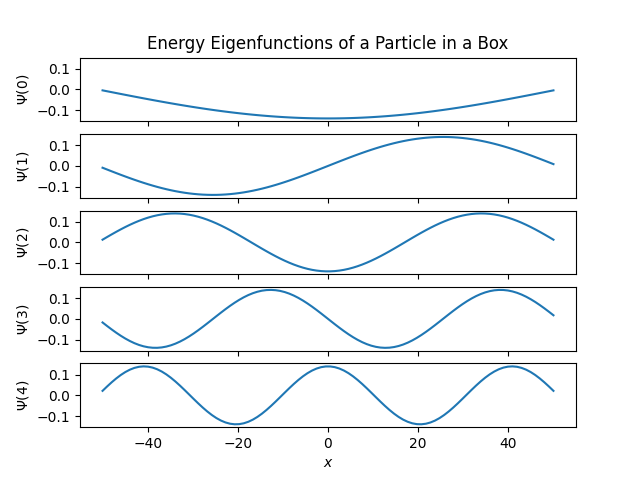

In [11]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Energy Eigenfunctions of a Particle in a Box')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('$Ψ({})$'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('$x$')

While this is theoretically all fine and good, being learned in the ways of quantum mechanics we know that the energy eigenfunction is not directly measurable. The probability distribution to find the particle at location $x$ comes from our wavefunction:

$$ p(x) = |\psi(x)|^2 $$

where $p(x)$ is the probability density function of outcomes from position measurements.

In [12]:
p = np.abs(vecs)**2

To compute the probability from our probability density function,  <font color='red'>all we need is to multiply $p(x)$ by the small length $dx$ over which the measurement is made. In our case, for simplicity, we will choose $dx = a$. </font>

$$ \mathrm{Prob}(x) = p(x) dx $$

<font color='red'>We'll plot the first five probability density functions below.</font>

In [13]:
probs = a*p

Text(0.5, 0, '$x$')

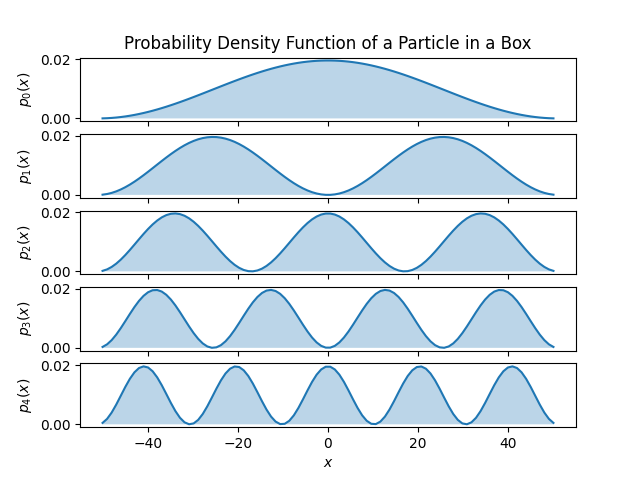

In [14]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Probability Density Function of a Particle in a Box')
for i, (ax, pd) in enumerate(zip(axes, p)):
    plt.sca(ax)
    plt.ylabel('$p_{}(x)$'.format(i))
    plt.plot(X, pd)
    plt.fill_between(X, pd, alpha=0.3)
plt.xlabel('$x$')

### Problem 2: Quantum Harmonic Oscillator

#### Part A:
Remember, the potential energy of a harmonic oscillators takes the form $V(x) = \frac{1}{2}kx^2$ where $k$ is the spring constant.
In our case, let us use:
$$ k = 2.10*10^{-8}  N/m $$
$$ m = 9.1*10^{-31}  kg $$
$$ \hbar = 1.054 * 10^{-34} J*s$$

Deliverables:
- Tabulate the lowest 5 energy eigenvalues <font color='red'>using the formula in Chapter 1 - Section 1.5.2.</font>
- Find the value of $\hbar \omega$, $E_2 - E_1$, $E_3 - E_2$, and $E_4 - E_3$? 


#### Part B:
<font color='red'>In Example 1, we computed and plotted the 5 lowest energy eigenfunctions of a particle in a box from `-L/2` to `L/2`.</font>
Now, do the same for a particle in a harmonic oscillator potential using the parameters given above. Assume that the length of the simulation region is $ L = 0.2 \mu m$

Further assume that the numerical values of the PE are: 
$$ PE(x)=   \left\{
\begin{array}{ll}
      \frac{1}{2} kx^2 & -0.06um<x<0.06um \\
      3.78*10^{-23} & Otherwise \\
\end{array} 
\right.  $$

Plot the PE(x) and realize that it is not perfectly Harmonic. This is usually the case in most realistic situations. Often there are anharmonic corrections to the PE. A common anharmonic correction that is encountered in qubits and crystals is a cubic term ($PE(x) = \frac{1}{2} kx^2 + \gamma x^3$).

We are next going to tabulate the energy eigenvalues and corresponding eigenfunctions from our numerical calculations.

Deliverables:
- Tabulate the lowest 5 energy eigenvalues, computed numerically.
- Find the value of $\hbar \omega$, $E_2 - E_1$, $E_3 - E_2$, and $E_4 - E_3$? Is there any difference between what you got in Part A?
- Plot of the wavefunctions of the lowest 5 energy eigenvalues
- Plot of the probability density functions of outcomes of position measurements for the lowest 5 energy eigenvalues


[Your answer here]

### Problem 3: Harmonic Oscillator Frequencies

### Read and try this but DO NOT SUBMIT

Once you have the energies of the wavefunctions for the quantum harmonic oscillator, let's make sure they look right.
We know that the energy eigenvalues of the quantum harmonic oscillator takes the form:

$$ E_n = \eta \omega (n + \frac{1}{2}) $$

where $n$ is the quantum number, $\eta$ is our natural constant ($\eta = \hbar$ in reality), and $\omega$ is the frequency of our oscillator.

You will note the ground state ($n=0$) still has some energy ($E_0=\frac{\eta \omega}{2}$), this is called the zero point energy, and it carries some deep significance in physics. (Among other things, the zero point energy is related to virtual photons predicted by Quantum Field Theory, and possibly even the dark energy in the universe...)

Anyway, use the computed energy values for the lowest 5 energy levels to estimate the frequency of our harmonic oscillator. Then use a smaller grid spacing (increase $N$) to make sure your estimate of the frequency has converged.

[Your answer here]

## Phase Shifts

It may seem strange for our wavefunction to be complex valued. The fact of the matter is we trust Schrödinger's equation more than we trust our interpretation of the wavefunction. Mathematically, complex eigenfunctions of the hamiltonian exist, so our interpretation better have an explanation to make sense of this mathematical quirk.

The, rather elegant, solution is to recognize that eventhough the wavefunction may be complex, the outcomes of measurements are actually the corresponding eigenvalues, so as long as the eigenvalues are always real, it doesn't matter if eigenfunctions have an imaginary component.

Another quirk of the Schrödinger equation is that given any solution $\Psi(x,t)$, any arbitrary phase shift of $\Psi(x,t)$ will still be a solution.

### Problem 4: Phase of the Wavefunction

### DO NOT SUBMIT
Show that if $\Psi(x,t)$ is a solution to the TDSE, then $e^{i\alpha} \Psi(x,t)$ (for some fixed $\alpha$) is also a solution. (Hint: this is a one liner)

[Your answer here]

## Example 2: Time Evolution

After turning the TDSE into the TISE using separation of variables, we focused on finding solutions for the TISE, but now that we have solutions for the TISE, we can go back and look at how our system evolves over time.

Once we have found an eigenfunction $\psi(x)$ and the corresponding energy eigenvalue $E$ using the TISE, we can combine it with the time component $\phi(t)$

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$

$$ \phi(t) = e^{-i\frac{E}{\hbar}t} $$

Now the overall solution to the TDSE is $\Psi(x,t) = \psi(x) \phi(t)$.

Let's take a look at how solutions to the particle in the box evolve over time using Matplotlib animations.

In [15]:
import matplotlib.animation as animation

First we solve the TISE for the particle in the box, once again, to get the energy eigenvalues and eigenfunctions.

In [16]:
N = 100
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

# Define discretized hamiltonian
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1)

# Solve TISE to get wavefunctions and energies
vals, vecs = np.linalg.eig(H)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
# Normalize wavefunction
vecs /= np.sqrt(a)

Now we define a function for matplotlib to call during the animation to get the state (wavefunction) at particular time intervals.

In [17]:
def evolve(psi, E, timestep=5, num_step=200):
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        phase = np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, phase * psi

Here you can choose what the state of the particle should be, where `level = 0` corresponds to the ground state, `level = 1` to the first excited state etc.

In [18]:
level = 3
psi = vecs[level].astype(np.complex64)
E = vals[level]

Real component in blue, imaginary in red


/tmp/ipykernel_1743160/879729049.py:34: UserWarning: frames=<generator object evolve at 0x7986ed3cf840> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)


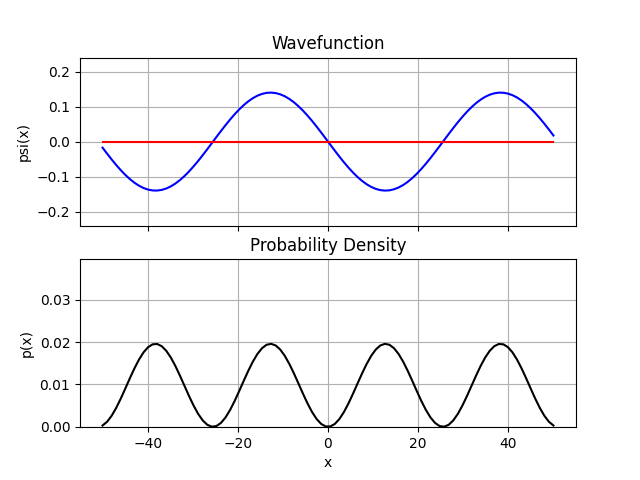

In [19]:
evolution = evolve(psi, E)

print('Real component in blue, imaginary in red')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = psi
wave_real, = ax1.plot(X, wave.real, c='b')
wave_imag, = ax1.plot(X, wave.imag, c='r')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data): # this updates the plot at every timestep given the wavefunction at the new time
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

Note how even though the wavefunction is changing over time, the resulting probability density over positions doesn't change. We call the eigenstates (eigenfunctions) of the Hamiltonian stationary because the time dependence only changes the overall phase of the state, not any observable property of our particle.

### Problem 5: Wavefunctions Oscillate

### SUBMIT YOUR RESPONSE

As the time evolution of our stationary states is given by $ e^{-i\frac{E}{\hbar}t} $, we know our wavefunction oscillates with time.

Given a particle in the box in the second excited state $\psi_2$ with $\eta = 1$, $m = 1$, $L = 100$, and $N = 100$ (using the notation in the code, $a \approx 1$). If the wavefunction of our particle is entirely real at $t = 0$, what is the smallest amount of time we have to wait before the wavefunction is once again entirely real?

Compare the result you get using the numerical approach in Example 2 to what you would expect in theory.

[Your answer here]